In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install gdown


  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)


In [13]:
# Downloading and loading the dataset
import gdown
import pandas as pd

# Define Google Drive link for the dataset
gdrive_link = "https://drive.google.com/uc?export=download&id=1_e9Q4-ymjHYNFJzVwbVXXPrYI33786oW"  # Replace FILE_ID_RAW_DATA

# Define local path to save the dataset
local_path = "../data/raw/raw_data.csv"

# Download the dataset
print("Downloading the dataset for EDA...")
gdown.download(gdrive_link, local_path, quiet=False)

# Load the dataset
df = pd.read_csv(local_path)
print("Dataset loaded successfully.")

df.head()


Downloading...
From: https://drive.google.com/uc?export=download&id=1_e9Q4-ymjHYNFJzVwbVXXPrYI33786oW
To: e:\fake-news-detection\data\raw\raw_data.csv
100%|██████████| 88.3M/88.3M [00:01<00:00, 65.7MB/s]


Dataset loaded successfully.


C:\Users\joshv\AppData\Local\Temp\ipykernel_15160\377249282.py:16: DtypeWarning: Columns (2,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path)


,title,text,label,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Raw data visualization

In [15]:
# Drop columns with names starting with 'Unnamed:'
df = df.loc[:, ~df.columns.str.contains('^Unnamed:')]

# Check the remaining columns
print(df.columns)


Index(['title', 'text', 'label'], dtype='object')


In [19]:
print(df.info())
print("---------------------------------------------------")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 31794 entries, 0 to 31795
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   31794 non-null  object
 1   text    31794 non-null  object
 2   label   31794 non-null  object
dtypes: object(3)
memory usage: 993.6+ KB
None
---------------------------------------------------
                                                    title  \
count                                               31794   
unique                                              31202   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text  label  
count                                               31794  31794  
unique                                              31554      4  
top     (Reuters) - Highlights for U.S. President Dona...   True  
freq                                        

In [16]:
print(df.isnull().sum())

title    1
text     0
label    2
dtype: int64


In [17]:
# Remove rows with null values in any column
df = df.dropna()

# Check the shape of the updated dataframe
print(f"Updated dataframe shape: {df.shape}")

# Verify that null values are removed
print(df.isnull().sum())


Updated dataframe shape: (31794, 3)
title    0
text     0
label    0
dtype: int64


In [18]:
print(df['label'].unique())
print('----------------------------')
print(df['label'].value_counts())


['FAKE' 'TRUE' True 'REAL']
----------------------------
label
True    16384
FAKE    10046
TRUE     5033
REAL      331
Name: count, dtype: int64


In [21]:
# Standardize the 'label' column
df['label'] = df['label'].replace({
    True: 'REAL',  # Replace boolean True with 'REAL'
    'TRUE': 'REAL',  # Replace 'TRUE' string with 'REAL'
    'FAKE': 'FAKE',  # Keep 'FAKE' as it is
    'REAL': 'REAL'   # Keep 'REAL' as it is
})

# Check unique values and their counts after standardization
print(df['label'].unique())
print('----------------------------')
print(df['label'].value_counts())

['FAKE' 'REAL']
----------------------------
label
REAL    21748
FAKE    10046
Name: count, dtype: int64


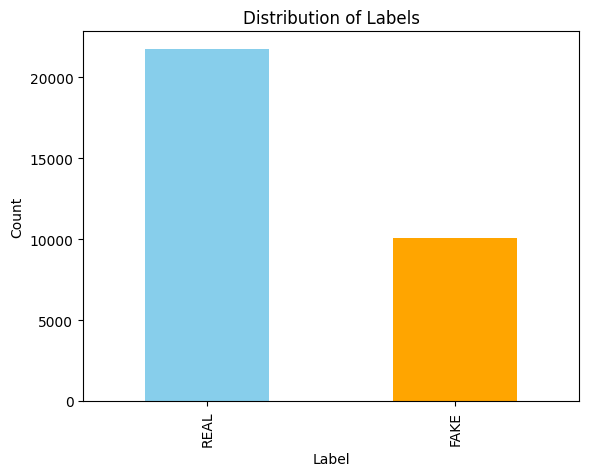

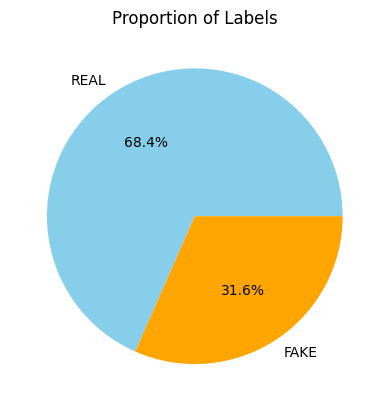

In [22]:
import matplotlib.pyplot as plt

# Bar plot
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Pie chart
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Proportion of Labels')
plt.ylabel('')  # To avoid y-axis label overlap
plt.show()


In [32]:
label_counts = df['label'].value_counts(normalize=True) * 100
print(label_counts)

#No, additional balancing techniques such as oversampling or undersampling are not required in this case.




label
REAL    68.402843
FAKE    31.597157
Name: proportion, dtype: float64


# Text Analysis

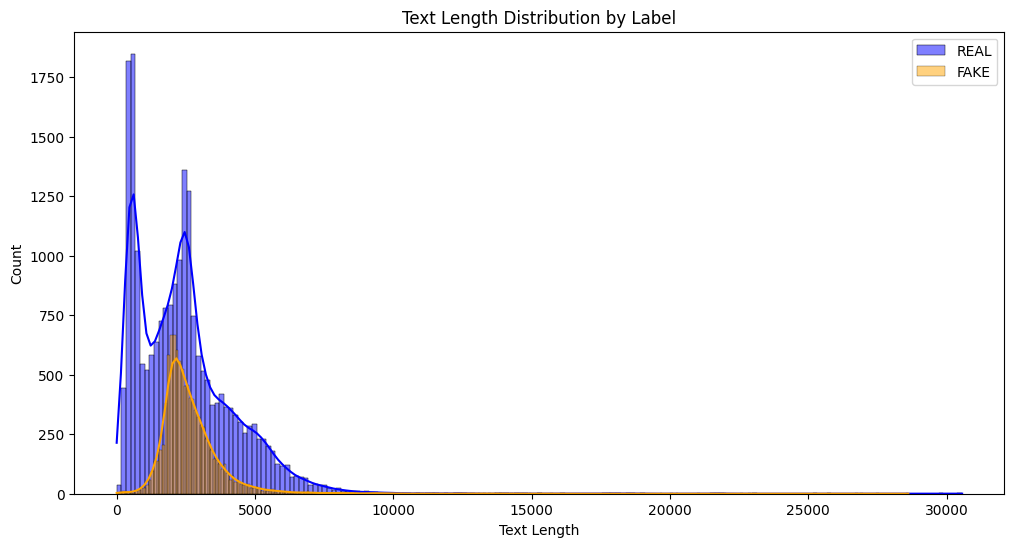

In [33]:
# Add new columns for text length
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

# Compare distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 'REAL']['text_length'], color='blue', label='REAL', kde=True)
sns.histplot(df[df['label'] == 'FAKE']['text_length'], color='orange', label='FAKE', kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.legend()
plt.show()


In [34]:
# Word count for title and text
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))

# Compare average word counts
print(df.groupby('label')[['title_word_count', 'text_word_count']].mean())


       title_word_count  text_word_count
label                                   
FAKE          13.444356       453.882142
REAL           9.950754       393.164567


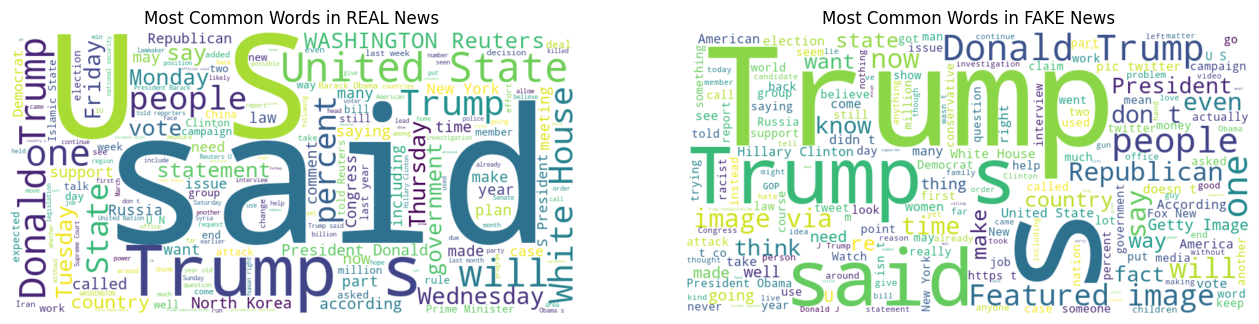

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=20)
real_words = vectorizer.fit_transform(df[df['label'] == 'REAL']['text'])
fake_words = vectorizer.fit_transform(df[df['label'] == 'FAKE']['text'])

# Generate word clouds
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['label'] == 'REAL']['text']))
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['label'] == 'FAKE']['text']))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in REAL News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in FAKE News')
plt.axis('off')

plt.show()


label
FAKE    0.056490
REAL    0.054004
Name: sentiment, dtype: float64


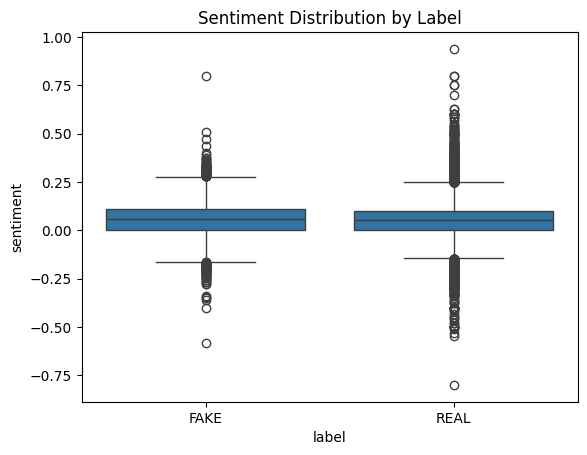

In [36]:
# !pip install textblob
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df.groupby('label')['sentiment'].mean())

# Visualize sentiment distribution
sns.boxplot(data=df, x='label', y='sentiment')
plt.title('Sentiment Distribution by Label')
plt.show()


label
FAKE    61.027970
REAL    52.012289
Name: readability, dtype: float64


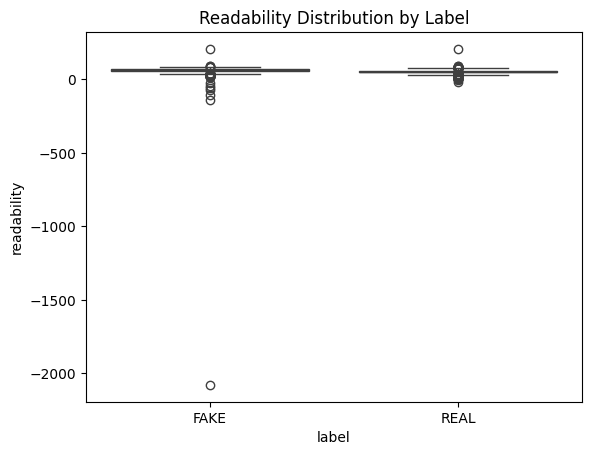

In [37]:
#!pip install textstat
from textstat import flesch_reading_ease

df['readability'] = df['text'].apply(flesch_reading_ease)
print(df.groupby('label')['readability'].mean())

sns.boxplot(data=df, x='label', y='readability')
plt.title('Readability Distribution by Label')
plt.show()


In [38]:
# Select numeric features for correlation
numeric_columns = ['title_length', 'text_length', 'title_word_count', 'text_word_count', 'sentiment', 'readability']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                  title_length  text_length  title_word_count  \
title_length          1.000000     0.040804          0.878247   
text_length           0.040804     1.000000          0.040847   
title_word_count      0.878247     0.040847          1.000000   
text_word_count       0.056715     0.993301          0.062270   
sentiment            -0.011748     0.044182          0.003806   
readability           0.125253     0.033906          0.210042   

                  text_word_count  sentiment  readability  
title_length             0.056715  -0.011748     0.125253  
text_length              0.993301   0.044182     0.033906  
title_word_count         0.062270   0.003806     0.210042  
text_word_count          1.000000   0.046282     0.072179  
sentiment                0.046282   1.000000     0.032146  
readability              0.072179   0.032146     1.000000  


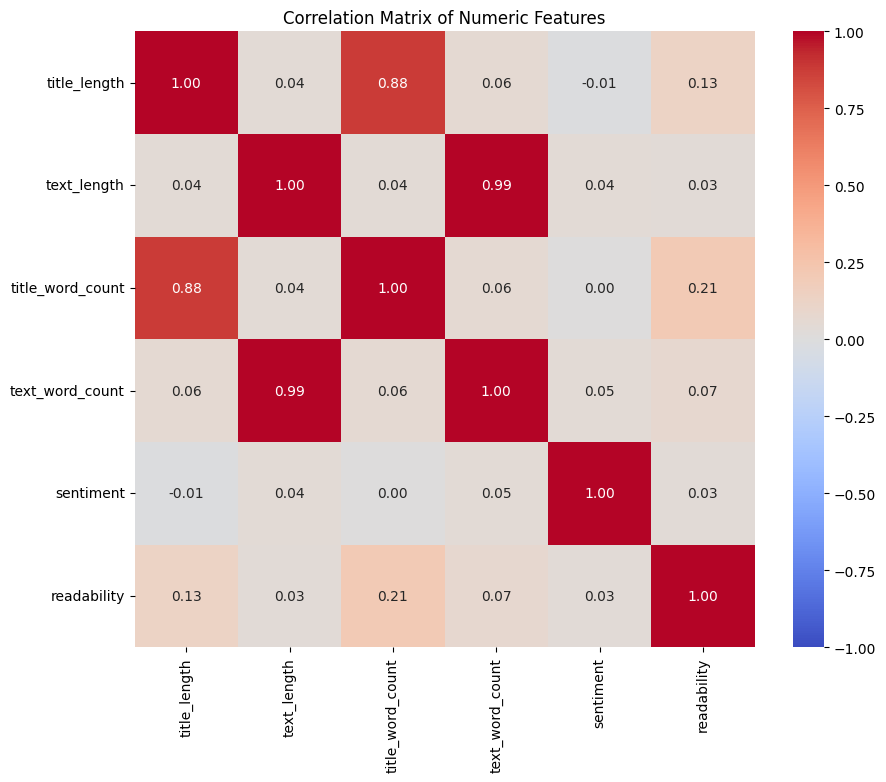

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [40]:
#dropping these columns as they are redundant
df = df.drop(columns=['text_word_count', 'title_word_count'])

In [41]:
# Encode labels as numeric (REAL: 1, FAKE: 0)
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'REAL' else 0)

# Calculate correlation with numeric features
numeric_features = ['title_length', 'text_length', 'sentiment', 'readability']
label_correlation = df[['label_encoded'] + numeric_features].corr()['label_encoded']

# Display correlation with the label
print(label_correlation)


label_encoded    1.000000
title_length    -0.611954
text_length     -0.076604
sentiment       -0.012759
readability     -0.263341
Name: label_encoded, dtype: float64


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31794 entries, 0 to 31795
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          31794 non-null  object 
 1   text           31794 non-null  object 
 2   label          31794 non-null  object 
 3   title_length   31794 non-null  int64  
 4   text_length    31794 non-null  int64  
 5   sentiment      31794 non-null  float64
 6   readability    31794 non-null  float64
 7   label_encoded  31794 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.2+ MB
None


In [ ]:
# # Save the processed DataFrame to a new CSV file
# df.to_csv('cleaned_data.csv', index=False)

# print("Processed data saved successfully to 'cleaned_data.csv'")


Processed data saved successfully to 'cleaned_data.csv'
